In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
import pickle

#from yellowbrick.classifier import classification_report
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.cluster import KMeans

In [7]:
#logistikte scale etmek zorunda değilsin ama knn, svm'de yapmak lazım.

In [8]:
df = pd.read_csv("yz.csv")

In [9]:
#fig = plt.figure(figsize=(20,20))
#df.corr()["karar"].sort_values().plot.barh()

In [10]:
X = df.drop("karar", axis=1)
y = df["karar"]

# LOGISTIC REGRESSION

In [11]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [16]:
log_model = LogisticRegression()
log_model.fit(X_egitim, y_egitim)
y_tahmin = log_model.predict(X_test)
confusion_matrix(y_test, y_tahmin)

array([[375,  37],
       [ 45, 143]], dtype=int64)

In [17]:
print(classification_report(y_test, y_tahmin))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       412
         1.0       0.79      0.76      0.78       188

    accuracy                           0.86       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.86      0.86      0.86       600



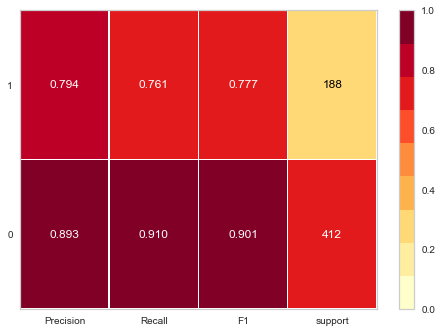

In [18]:
fig = plt.figure()

ClassificationReport(log_model, support=True).fit(X_egitim, y_egitim)
ClassificationReport(log_model, support=True).score(X_test, y_test)
ClassificationReport(log_model, support=True).finalize
plt.xticks([0.5, 1.5, 2.5, 3.5], ['Precision', 'Recall', 'F1', 'support'])
plt.yticks([0.5, 1.5], ['0', '1'])


plt.show()

# LOGISTIC REGRESSION SCALED

In [19]:
olcek = StandardScaler()
X_egitim = olcek.fit_transform(X_egitim)
X_test = olcek.transform(X_test)

In [20]:
scaleloj = LogisticRegression()
scaleloj.fit(X_egitim, y_egitim)
y_tahmin = scaleloj.predict(X_test)
confusion_matrix(y_test, y_tahmin)

array([[375,  37],
       [ 45, 143]], dtype=int64)

In [21]:
print(classification_report(y_test, y_tahmin))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       412
         1.0       0.79      0.76      0.78       188

    accuracy                           0.86       600
   macro avg       0.84      0.84      0.84       600
weighted avg       0.86      0.86      0.86       600



# KNN

In [22]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [23]:
olcek = StandardScaler()
X_egitim = olcek.fit_transform(X_egitim)
X_test = olcek.transform(X_test)
keyk_model = KNeighborsClassifier(n_neighbors = 11)
keyk_model.fit(X_egitim, y_egitim)

KNeighborsClassifier(n_neighbors=11)

In [24]:
y_tahmin = keyk_model.predict(X_test)
print(confusion_matrix(y_test, y_tahmin))
print(classification_report(y_test, y_tahmin))

[[333  79]
 [ 28 160]]
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86       412
         1.0       0.67      0.85      0.75       188

    accuracy                           0.82       600
   macro avg       0.80      0.83      0.81       600
weighted avg       0.84      0.82      0.83       600



# SVM

In [25]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [26]:
olcek  = StandardScaler()
X_egitim = olcek.fit_transform(X_egitim)
X_test = olcek.transform(X_test)
svm_model = SVC().fit(X_egitim, y_egitim)

In [27]:
y_tahmin = svm_model.predict(X_test)
print(confusion_matrix(y_test, y_tahmin))
print(classification_report(y_test, y_tahmin))

[[379  33]
 [ 37 151]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92       412
         1.0       0.82      0.80      0.81       188

    accuracy                           0.88       600
   macro avg       0.87      0.86      0.86       600
weighted avg       0.88      0.88      0.88       600



# Decision Tree

In [19]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [20]:
agac_model = DecisionTreeClassifier()
agac_model.fit(X_egitim, y_egitim)

DecisionTreeClassifier()

In [21]:
y_tahmin = agac_model.predict(X_test)
print(confusion_matrix(y_test, y_tahmin))
print(classification_report(y_test, y_tahmin))

[[401  11]
 [  6 182]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       412
         1.0       0.94      0.97      0.96       188

    accuracy                           0.97       600
   macro avg       0.96      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



# Random Forest

In [22]:
orman_model = RandomForestClassifier(random_state=42)
orman_model.fit(X_egitim, y_egitim)

RandomForestClassifier(random_state=42)

In [23]:
y_tahmin = orman_model.predict(X_test)
print(confusion_matrix(y_test, y_tahmin))
print(classification_report(y_test, y_tahmin))

[[409   3]
 [ 13 175]]
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       412
         1.0       0.98      0.93      0.96       188

    accuracy                           0.97       600
   macro avg       0.98      0.96      0.97       600
weighted avg       0.97      0.97      0.97       600



In [24]:
pickle.dump(orman_model, open("modelim", "wb"))

# XGBOOST

In [25]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [26]:
xgb_model = XGBClassifier()
xgb_model.fit(X_egitim, y_egitim)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [27]:
y_tahmin = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_tahmin))
print(classification_report(y_test, y_tahmin))

[[411   1]
 [  0 188]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       412
         1.0       0.99      1.00      1.00       188

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



In [28]:
pickle.dump(xgb_model, open("xgb", "wb"))

# TEK GİRİŞ

In [127]:
model = pickle.load(open("xgb", "rb"))

In [129]:
my_dict={'yas':30, 
         'alantecrübesi':2, 
         'maaşbeklentisi':5000, 
         'ensonücret':4000, 
         'yzbilgi':2,
         #'medenidurum_bekar':0,
         #'medenidurum_evli':1,
         #'askerlikdurumu_muaf/tamamlandı':1, 
         #'askerlikdurumu_tamamlanmadı':0,
         'egitim_doktora':0, 
         'egitim_lisans':1, 
         'egitim_yükseklisans':0,
         'egitim_önlisans':0, 
         'lisansbölümü_Bilgisayar':0,
         'lisansbölümü_Bilgisayar Mühendisliği':1,
         'lisansbölümü_Endüstri Mühendisliği':0, 
         'lisansbölümü_Matematik':0,
         'lisansbölümü_Matematik Mühendisliği':0,
         'lisansbölümü_İstatistik':0,
         #'yükseklisansbölümü_0':0, 
         'yükseklisansbölümü_Bilgisayar Mühendisliği':0,
         'yükseklisansbölümü_Endüstri Mühendisliği':0,
         'yükseklisansbölümü_Veri Bilimi':0,
         'yükseklisansbölümü_Yönetim Bilişim Sistemleri':0,
         'yükseklisansbölümü_İstatistik':0, 
         #'doktorabölümü_0':0,
         'doktorabölümü_Bilgisayar Mühendisliği':0,
         'doktorabölümü_Endüstri Mühendisliği':0, 
         'doktorabölümü_Veri Bilimi':0,
         'doktorabölümü_Yönetim Bilişim Sistemleri':0, 
         'doktorabölümü_İstatistik':0,
         'adlisicilkaydı_vardır':0, 
         'adlisicilkaydı_yoktur':1,
         'seyahatengeli_vardır':0, 
         'seyahatengeli_yoktur':1, 
         'referans_vardır':0,
         'referans_yoktur':1, 
         'kurs_aldım':0, 
         'kurs_almadım':1,
         'vardiyaimkanı_çalışabilirim':1, 
         'vardiyaimkanı_çalışamam':0, 
         'dil_almanca':0,
         'dil_arapça':0, 
         'dil_bilmiyor':0, 
         'dil_fransızca':0,
         'dil_ingilizce':0,
         'dil_rusça':0, 
         'program_C':0, 
         'program_C++':0, 
         'program_R':1, 
         'program_bos':0,
         'program_javascript':0,
         'program_julia':0, 
         'program_python':0,
         'program_scala':0,
         'program_sql':0, 
         'program_PHP':0}